## Common

In [1]:
import google.colab.drive
path_root = '/content/drive'
google.colab.drive.mount( path_root )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
path_project = path_root + '/Shared drives/MOXA/Railway Wi-Fi/'
os.chdir( path_project ); os.getcwd()

'/content/drive/Shared drives/MOXA/Railway Wi-Fi'

In [0]:
import networkx
import matplotlib.pyplot
import numpy
import moxa_wifi_rail

## Graph

### Interference 400m Cross

In [11]:
# R Line
nodes_r, edges_r = moxa_wifi_rail.get_R_Line( interference_level = 2 )
print( len( nodes_r ) , nodes_r )
print( len( edges_r ) , edges_r )

# G Line
nodes_g, edges_g = moxa_wifi_rail.get_G_Line( interference_level = 2 )
print( len( nodes_g ) , nodes_g )
print( len( edges_g ) , edges_g )

# R x G
edges_cross = moxa_wifi_rail.get_cross_edges( nodes_r, nodes_g, interference_level = 2 )
print( len( edges_cross ), edges_cross )

269 [('R02.0', 'R02.1'), ('R02.1', 'R02.2'), ('R02.2', 'R02.3'), ('R02.3', 'R02.4'), ('R02.4', 'R02.5'), ('R02.5', 'R02.6'), ('R02.6', 'R02.7'), ('R02.7', 'R02.8'), ('R02.8', 'R02.9'), ('R02.9', 'R03.0'), ('R03.0', 'R03.1'), ('R03.1', 'R03.2'), ('R03.2', 'R03.3'), ('R03.3', 'R03.4'), ('R03.4', 'R03.5'), ('R03.5', 'R03.6'), ('R03.6', 'R03.7'), ('R03.7', 'R03.8'), ('R03.8', 'R03.9'), ('R03.9', 'R04.0'), ('R04.0', 'R04.1'), ('R04.1', 'R04.2'), ('R04.2', 'R04.3'), ('R04.3', 'R04.4'), ('R04.4', 'R04.5'), ('R04.5', 'R04.6'), ('R04.6', 'R04.7'), ('R04.7', 'R04.8'), ('R04.8', 'R04.9'), ('R04.9', 'R05.0'), ('R05.0', 'R05.1'), ('R05.1', 'R05.2'), ('R05.2', 'R05.3'), ('R05.3', 'R05.4'), ('R05.4', 'R05.5'), ('R05.5', 'R05.6'), ('R05.6', 'R05.7'), ('R05.7', 'R05.8'), ('R05.8', 'R05.9'), ('R05.9', 'R06.0'), ('R06.0', 'R06.1'), ('R06.1', 'R06.2'), ('R06.2', 'R06.3'), ('R06.3', 'R06.4'), ('R06.4', 'R06.5'), ('R06.5', 'R06.6'), ('R06.6', 'R06.7'), ('R06.7', 'R06.8'), ('R06.8', 'R06.9'), ('R06.9', 'R07.

In [12]:
g_metro = networkx.Graph()
g_metro.add_nodes_from( nodes_r )
g_metro.add_nodes_from( nodes_g )
g_metro.add_edges_from( edges_r )
g_metro.add_edges_from( edges_g )
g_metro.add_edges_from( edges_cross )
print( g_metro.number_of_nodes() )
print( g_metro.number_of_edges() )

460
940


11
19


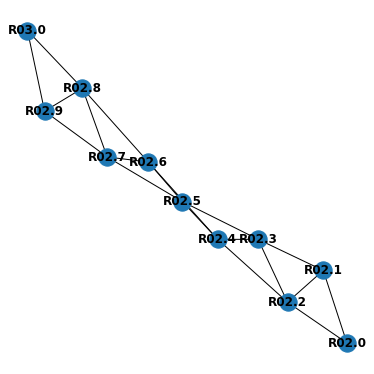

In [13]:
g_metro_sub = g_metro.subgraph( nodes_r[ : 11 ] )
print( g_metro_sub.number_of_nodes() )
print( g_metro_sub.number_of_edges() )

matplotlib.pyplot.figure( figsize = ( 5, 5 ) )
networkx.draw( g_metro_sub, with_labels = True, font_weight = 'bold' )

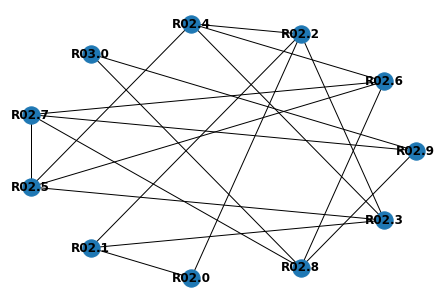

In [0]:
networkx.draw_shell( g_metro_sub, with_labels = True, font_weight = 'bold' )

110
240


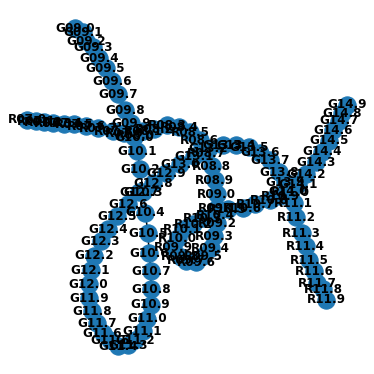

In [14]:
n_segment = 10
n_line = 5

# nodes_cross = nodes_r[ ( 8 - 2 ) * n_segment - n_line : ( 8 - 2 ) * n_segment + n_line + 1 ]
# nodes_cross += nodes_g[ ( 10 - 1 ) * n_segment - n_line : ( 10 - 1 ) * n_segment + n_line + 1 ]
nodes_cross = nodes_r[ ( (8 - 1) - 2 ) * n_segment : ( (11 + 1) - 2 ) * n_segment ]
nodes_cross += nodes_g[ ( (10 - 1) - 1 ) * n_segment : ( (14 + 1) - 1 ) * n_segment ]


g_metro_sub = g_metro.subgraph( nodes_cross )
print( g_metro_sub.number_of_nodes() )
print( g_metro_sub.number_of_edges() )

matplotlib.pyplot.figure( figsize = ( 5, 5 ) )
networkx.draw( g_metro_sub, with_labels = True, font_weight = 'bold' )

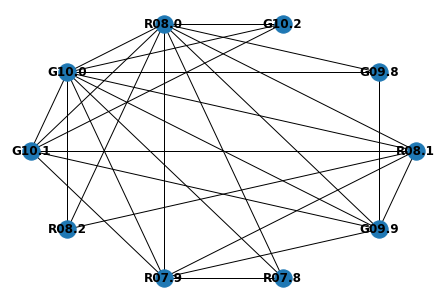

In [0]:
networkx.draw_shell( g_metro_sub, with_labels = True, font_weight = 'bold' )

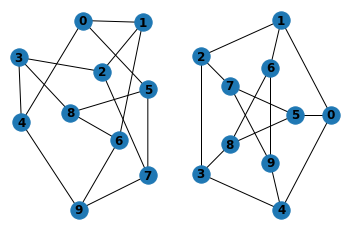

In [0]:
G = networkx.petersen_graph()
matplotlib.pyplot.subplot(121)
networkx.draw( G, with_labels=True, font_weight='bold')
matplotlib.pyplot.subplot(122)
networkx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [0]:
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_400m.graphml' )
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_400m_l10.graphml' )
networkx.write_graphml( g_metro_sub, path_project + '/Station_R07-12_G09-15_400m.graphml' )

### Interference 200m Cross

In [0]:
# R Line
nodes_r, edges_r = get_R_Line( interference_level = 1 )
print( len( nodes_r ) , nodes_r )
print( len( edges_r ) , edges_r )

# G Line
nodes_g, edges_g = get_G_Line( interference_level = 1 )
print( len( nodes_g ) , nodes_g )
print( len( edges_g ) , edges_g )

# R x G
edges_cross = get_cross_edges( nodes_r, nodes_g, interference_level = 1 )
print( len( edges_cross ), edges_cross )

269 [('R02.0', 'R02.1'), ('R02.1', 'R02.2'), ('R02.2', 'R02.3'), ('R02.3', 'R02.4'), ('R02.4', 'R02.5'), ('R02.5', 'R02.6'), ('R02.6', 'R02.7'), ('R02.7', 'R02.8'), ('R02.8', 'R02.9'), ('R02.9', 'R03.0'), ('R03.0', 'R03.1'), ('R03.1', 'R03.2'), ('R03.2', 'R03.3'), ('R03.3', 'R03.4'), ('R03.4', 'R03.5'), ('R03.5', 'R03.6'), ('R03.6', 'R03.7'), ('R03.7', 'R03.8'), ('R03.8', 'R03.9'), ('R03.9', 'R04.0'), ('R04.0', 'R04.1'), ('R04.1', 'R04.2'), ('R04.2', 'R04.3'), ('R04.3', 'R04.4'), ('R04.4', 'R04.5'), ('R04.5', 'R04.6'), ('R04.6', 'R04.7'), ('R04.7', 'R04.8'), ('R04.8', 'R04.9'), ('R04.9', 'R05.0'), ('R05.0', 'R05.1'), ('R05.1', 'R05.2'), ('R05.2', 'R05.3'), ('R05.3', 'R05.4'), ('R05.4', 'R05.5'), ('R05.5', 'R05.6'), ('R05.6', 'R05.7'), ('R05.7', 'R05.8'), ('R05.8', 'R05.9'), ('R05.9', 'R06.0'), ('R06.0', 'R06.1'), ('R06.1', 'R06.2'), ('R06.2', 'R06.3'), ('R06.3', 'R06.4'), ('R06.4', 'R06.5'), ('R06.5', 'R06.6'), ('R06.6', 'R06.7'), ('R06.7', 'R06.8'), ('R06.8', 'R06.9'), ('R06.9', 'R07.

In [0]:
g_metro = networkx.Graph() # the g in g_metro means 'graph'
g_metro.add_nodes_from( nodes_r )
g_metro.add_nodes_from( nodes_g )
g_metro.add_edges_from( edges_r )
g_metro.add_edges_from( edges_g )
g_metro.add_edges_from( edges_cross )
print( g_metro.number_of_nodes() )
print( g_metro.number_of_edges() )

460
467


11
10


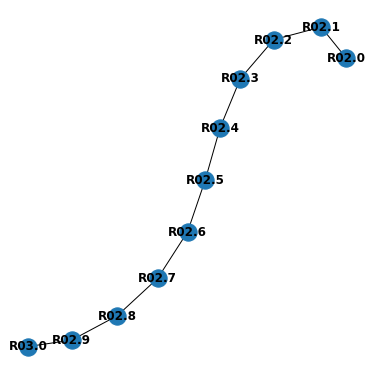

In [0]:
g_metro_sub = g_metro.subgraph( nodes_r[ : 11 ] )
print( g_metro_sub.number_of_nodes() )
print( g_metro_sub.number_of_edges() )

matplotlib.pyplot.figure( figsize = ( 5, 5 ) )
networkx.draw( g_metro_sub, with_labels = True, font_weight = 'bold' )

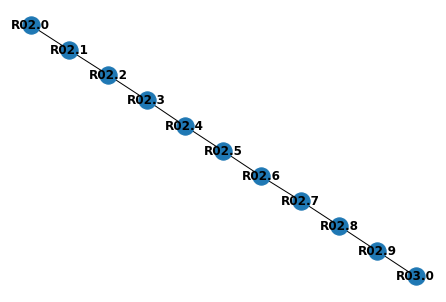

In [0]:
networkx.draw_kamada_kawai( g_metro_sub, with_labels = True, font_weight = 'bold' )

10
17


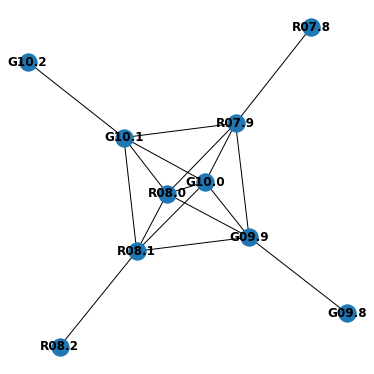

In [0]:
n_segment = 10
nodes_cross = nodes_r[ ( 8 - 2 ) * n_segment - 2 : ( 8 - 2 ) * n_segment + 3 ]
nodes_cross += nodes_g[ ( 10 - 1 ) * n_segment - 2 : ( 10 - 1 ) * n_segment + 3 ]
g_metro_sub = g_metro.subgraph( nodes_cross )
print( g_metro_sub.number_of_nodes() )
print( g_metro_sub.number_of_edges() )

matplotlib.pyplot.figure( figsize = ( 5, 5 ) )
networkx.draw( g_metro_sub, with_labels = True, font_weight = 'bold' )

In [0]:
networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_200m.graphml' )

## Channels Configuration

In [19]:
# g_metro_sub = networkx.read_graphml( path_project + '/Station_R08_G10_200m.graphml' )
# g_metro_sub = networkx.read_graphml( path_project + '/Station_R08_G10_400m.graphml' )
g_metro_sub = networkx.read_graphml( path_project + '/Station_R07-12_G09-15_400m.graphml' )
moxa_wifi_rail.show_nodes_attributes( g_metro_sub )

G10.0 9 {}
G11.3 4 {}
R11.9 2 {}
R09.8 4 {}
G10.2 5 {}
R09.6 4 {}
G13.8 5 {}
R08.2 5 {}
R07.6 4 {}
G10.7 4 {}
G11.4 4 {}
G11.0 4 {}
R11.3 4 {}
R07.5 4 {}
G12.8 4 {}
R08.7 4 {}
G09.2 4 {}
R09.2 4 {}
G11.6 4 {}
G09.8 5 {}
R08.0 9 {}
G10.6 4 {}
G12.1 4 {}
G09.3 4 {}
R10.8 5 {}
G14.4 4 {}
R09.7 4 {}
G12.5 4 {}
G10.3 4 {}
G14.9 2 {}
R10.3 4 {}
G12.4 4 {}
R10.7 4 {}
G13.6 4 {}
G09.5 4 {}
R10.1 4 {}
G11.2 4 {}
G11.1 4 {}
R11.0 9 {}
G14.8 3 {}
R08.8 4 {}
G13.4 4 {}
G09.1 3 {}
G09.0 2 {}
R08.9 4 {}
G09.9 7 {}
G12.3 4 {}
R07.0 2 {}
G11.7 4 {}
R08.3 4 {}
G13.5 4 {}
G10.8 4 {}
G12.7 4 {}
R09.0 4 {}
R08.1 7 {}
G13.3 4 {}
R11.1 7 {}
G12.0 4 {}
R10.4 4 {}
G09.7 4 {}
G13.2 4 {}
R10.2 4 {}
R07.2 4 {}
G14.5 4 {}
R11.8 3 {}
R11.6 4 {}
R08.4 4 {}
R07.1 3 {}
R11.4 4 {}
R09.9 4 {}
G11.5 4 {}
R10.9 7 {}
G13.0 4 {}
R07.4 4 {}
G10.4 4 {}
G13.1 4 {}
R07.3 4 {}
G14.1 7 {}
G14.3 4 {}
R10.6 4 {}
G09.6 4 {}
G14.2 5 {}
G11.8 4 {}
R11.5 4 {}
R10.0 4 {}
R08.5 4 {}
R07.7 4 {}
G12.9 4 {}
R11.2 5 {}
R07.9 7 {}
G12.2 4 {}

In [20]:
moxa_wifi_rail.initialize_nodes_available_channels( g_metro_sub, '1,6,11,16,21' )
moxa_wifi_rail.show_nodes_attributes( g_metro_sub )

G10.0 9 {'available_channels_prioritized': '1,6,11,16,21'}
G11.3 4 {'available_channels_prioritized': '1,6,11,16,21'}
R11.9 2 {'available_channels_prioritized': '1,6,11,16,21'}
R09.8 4 {'available_channels_prioritized': '1,6,11,16,21'}
G10.2 5 {'available_channels_prioritized': '1,6,11,16,21'}
R09.6 4 {'available_channels_prioritized': '1,6,11,16,21'}
G13.8 5 {'available_channels_prioritized': '1,6,11,16,21'}
R08.2 5 {'available_channels_prioritized': '1,6,11,16,21'}
R07.6 4 {'available_channels_prioritized': '1,6,11,16,21'}
G10.7 4 {'available_channels_prioritized': '1,6,11,16,21'}
G11.4 4 {'available_channels_prioritized': '1,6,11,16,21'}
G11.0 4 {'available_channels_prioritized': '1,6,11,16,21'}
R11.3 4 {'available_channels_prioritized': '1,6,11,16,21'}
R07.5 4 {'available_channels_prioritized': '1,6,11,16,21'}
G12.8 4 {'available_channels_prioritized': '1,6,11,16,21'}
R08.7 4 {'available_channels_prioritized': '1,6,11,16,21'}
G09.2 4 {'available_channels_prioritized': '1,6,11,16,21

In [0]:
nodes = [ ( node, g_metro_sub.degree( node ) ) for node in g_metro_sub.nodes ]
print( nodes )
print( sorted( nodes, key = lambda n: n[1], reverse = True ) )

[('R08.5', 4), ('G09.4', 4), ('R07.4', 4), ('G09.7', 4), ('G09.8', 5), ('G10.2', 5), ('G10.8', 4), ('G10.3', 4), ('R07.5', 4), ('G10.4', 4), ('G10.6', 4), ('R07.9', 7), ('R08.8', 4), ('G09.5', 4), ('G09.9', 7), ('R08.6', 4), ('G10.5', 4), ('R07.1', 3), ('R07.6', 4), ('G10.1', 7), ('G09.3', 4), ('G09.2', 4), ('G09.1', 3), ('R08.1', 7), ('R08.9', 3), ('R07.7', 4), ('G10.0', 9), ('R08.7', 4), ('G10.7', 4), ('R08.3', 4), ('R07.3', 4), ('R07.8', 5), ('G10.9', 3), ('R07.2', 4), ('G09.0', 2), ('R09.0', 2), ('R08.0', 9), ('G11.0', 2), ('R08.2', 5), ('R08.4', 4), ('G09.6', 4), ('R07.0', 2)]
[('G10.0', 9), ('R08.0', 9), ('R07.9', 7), ('G09.9', 7), ('G10.1', 7), ('R08.1', 7), ('G09.8', 5), ('G10.2', 5), ('R07.8', 5), ('R08.2', 5), ('R08.5', 4), ('G09.4', 4), ('R07.4', 4), ('G09.7', 4), ('G10.8', 4), ('G10.3', 4), ('R07.5', 4), ('G10.4', 4), ('G10.6', 4), ('R08.8', 4), ('G09.5', 4), ('R08.6', 4), ('G10.5', 4), ('R07.6', 4), ('G09.3', 4), ('G09.2', 4), ('R07.7', 4), ('R08.7', 4), ('G10.7', 4), ('R0

In [0]:
print( sorted( g_metro_sub.nodes, key = lambda n: g_metro_sub.degree( n ), reverse = True ) )
print( moxa_wifi_rail.get_nodes_sorted_for_config( g_metro_sub, g_metro_sub.nodes ) )

['G10.0', 'R08.0', 'R07.9', 'G09.9', 'G10.1', 'R08.1', 'G09.8', 'G10.2', 'R07.8', 'R08.2', 'R08.5', 'G09.4', 'R07.4', 'G09.7', 'G10.8', 'G10.3', 'R07.5', 'G10.4', 'G10.6', 'R08.8', 'G09.5', 'R08.6', 'G10.5', 'R07.6', 'G09.3', 'G09.2', 'R07.7', 'R08.7', 'G10.7', 'R08.3', 'R07.3', 'R07.2', 'R08.4', 'G09.6', 'R07.1', 'G09.1', 'R08.9', 'G10.9', 'G09.0', 'R09.0', 'G11.0', 'R07.0']
['G10.0', 'R08.0', 'R07.9', 'G09.9', 'G10.1', 'R08.1', 'G09.8', 'G10.2', 'R07.8', 'R08.2', 'R08.5', 'G09.4', 'R07.4', 'G09.7', 'G10.8', 'G10.3', 'R07.5', 'G10.4', 'G10.6', 'R08.8', 'G09.5', 'R08.6', 'G10.5', 'R07.6', 'G09.3', 'G09.2', 'R07.7', 'R08.7', 'G10.7', 'R08.3', 'R07.3', 'R07.2', 'R08.4', 'G09.6', 'R07.1', 'G09.1', 'R08.9', 'G10.9', 'G09.0', 'R09.0', 'G11.0', 'R07.0']


In [21]:
moxa_wifi_rail.configure_nodes_current_channel( g_metro_sub, g_metro_sub.nodes )

['1', '6', '11', '16', '21']
G10.0 1
['6', '11', '16', '21']
R08.0 6
['1', '6', '11', '16', '21']
R11.0 1
['6', '11', '16', '21']
G14.0 6
['11', '16', '21']
G09.9 11
['16', '21']
R08.1 16
['11', '16', '21']
R11.1 11
['16', '21']
R10.9 16
['21']
G14.1 21
['21']
R07.9 21
Not enough available channels to avoid interference.
G10.1 
Not enough available channels to avoid interference.
G13.9 
['11', '16', '21']
G10.2 11
['11', '16', '21']
G13.8 11
['11', '21']
R08.2 11
['16', '21']
G09.8 16
['11', '21']
R10.8 11
['11', '16']
G14.2 11
['16', '21']
R11.2 16
['11', '16']
R07.8 11
['1', '6', '11', '16', '21']
G11.3 1
['1', '6', '11', '16', '21']
R09.8 1
['6', '11', '16', '21']
R09.6 6
['1', '6', '16', '21']
R07.6 1
['1', '6', '11', '16', '21']
G10.7 1
['6', '11', '16', '21']
G11.4 6
['1', '6', '11', '16', '21']
G11.0 1
['1', '6', '21']
R11.3 1
['6', '11', '16', '21']
R07.5 6
['1', '6', '11', '16', '21']
G12.8 1
['1', '6', '11', '16', '21']
R08.7 1
['1', '6', '11', '16', '21']
G09.2 1
['1', '6', 

In [24]:
moxa_wifi_rail.check_interference( g_metro_sub, 'R07.9' )

R07.9 21 [('G10.0', '1'), ('R08.0', '6'), ('G09.9', '11'), ('R08.1', '16'), ('R07.7', '16'), ('R07.8', '11'), ('G10.1', '')]


In [22]:
moxa_wifi_rail.check_system_channels_configuration( g_metro_sub )

node(s) with current channels: ['G10.0', 'G11.3', 'R11.9', 'R09.8', 'G10.2', 'R09.6', 'G13.8', 'R08.2', 'R07.6', 'G10.7', 'G11.4', 'G11.0', 'R11.3', 'R07.5', 'G12.8', 'R08.7', 'G09.2', 'R09.2', 'G11.6', 'G09.8', 'R08.0', 'G10.6', 'G12.1', 'G09.3', 'R10.8', 'G14.4', 'R09.7', 'G12.5', 'G10.3', 'G14.9', 'R10.3', 'G12.4', 'R10.7', 'G13.6', 'G09.5', 'R10.1', 'G11.2', 'G11.1', 'R11.0', 'G14.8', 'R08.8', 'G13.4', 'G09.1', 'G09.0', 'R08.9', 'G09.9', 'G12.3', 'R07.0', 'G11.7', 'R08.3', 'G13.5', 'G10.8', 'G12.7', 'R09.0', 'R08.1', 'G13.3', 'R11.1', 'G12.0', 'R10.4', 'G09.7', 'G13.2', 'R10.2', 'R07.2', 'G14.5', 'R11.8', 'R11.6', 'R08.4', 'R07.1', 'R11.4', 'R09.9', 'G11.5', 'R10.9', 'G13.0', 'R07.4', 'G10.4', 'G13.1', 'R07.3', 'G14.1', 'G14.3', 'R10.6', 'G09.6', 'G14.2', 'G11.8', 'R11.5', 'R10.0', 'R08.5', 'R07.7', 'G12.9', 'R11.2', 'R07.9', 'G12.2', 'R07.8', 'G14.0', 'R09.1', 'G10.9', 'G11.9', 'G13.7', 'G09.4', 'R10.5', 'G12.6', 'G10.5', 'R09.4', 'G14.7', 'R09.3', 'G14.6', 'R08.6', 'R11.7', 'R09.

In [0]:
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_200m_Config.graphml' )
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R07-12_G09-15_400m_Config.graphml' )
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_400m_Config_NotEnough.graphml' )
# networkx.write_graphml( g_metro_sub, path_project + '/Station_R08_G10_400m_Config_NotEnough_13579.graphml' )
networkx.write_graphml( g_metro_sub, path_project + '/Station_R07-12_G09-15_400m_Config_20190902-2.graphml' )